# Data Cleaning & EDA On Used Cars Dataset

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market. In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market. We have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

#  Import Python Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno  # to get visualization on missing values
#pd.set_option('display.max_colwidth',400)
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [56]:
df = pd.read_csv("used_cars_data.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Analyzing the Data

In [57]:
df.shape               # Number of rows and columns in a dataset

(7253, 14)

In [58]:
df.info()              # understand the data type and information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [59]:
df.isna().sum()              # Missing Values Calculation

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [60]:
df.nunique()                   # Check for Duplication

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [61]:
# Count of Categorical and Numerical columns

In [62]:
cat=[i for i in df.columns if df[i].dtypes=='object']    # Making a list of all categorical variables

# Printing number of count of each unique value in each column
for column in cat:                               
    print(df[column].value_counts())
    print("#" * 40)

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
########################################
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
########################################
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
########################################
Manual       5204
Autom

# Observations

Maximum car being sold have fuel type as Diesel.

Mumbai has highest numbers of car availabe for purchase.

5204 cars with Manual transmission are available for purchase.

Most of the cars are 5 seaters and First owned.

Years of car ranges form 1996- 2015

In [63]:
df = df.drop(['S.No.'], axis = 1)  # Remove unnecessary column from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


# Feature Engineering
To select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

In [64]:
# Datatype for Engine ,Power and Mileage are object because of unit assigned ,so striping units.
df[['Engine','Power','Mileage']].sample(5)

,Engine,Power,Mileage
4554,1995 CC,190 bhp,21.76 kmpl
530,1373 CC,93.7 bhp,16.02 kmpl
5002,1995 CC,190 bhp,18.56 kmpl
611,2967 CC,241.4 bhp,12.07 kmpl
7073,1120 CC,70 bhp,24.0 kmpl


In [65]:
# Remove units

df["Mileage"] = df["Mileage"].str.rstrip(" kmpl")
df["Mileage"] = df["Mileage"].str.rstrip(" km/g")
df["Engine"] = df["Engine"].str.rstrip(" CC")

#remove bhp and replace null with nan

df["Power"] = df["Power"].str.rstrip(" bhp")
df["Power"]= df["Power"].replace(regex="null", value = np.nan)

In [66]:
#converting object data type to category data type

df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
#converting datatype  

df["Mileage"] = df["Mileage"].astype(float)
df["Power"] = df["Power"].astype(float)
df["Engine"]= df["Engine"].astype(float)


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.17,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.00,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.00,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


# Creating Features

If we see the sample data, the column “Year” shows the manufacturing year of the car.
It would be difficult to find the car’s age if it is in year format as the Age of the car is a contributing factor to Car Price. 

Add a new column, “Car_Age” to know the age of the car

In [68]:
from datetime import date
date.today().year
df['Car_Age']=date.today().year-df['Year']
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,13


Since car names will not be great predictors of the price in our current data. But we can process this column to extract important information using brand and Model names. Let’s split the name and introduce new variables “Brand” and “Model”

In [69]:
df['Brand'] = df.Name.str.split().str.get(0)
df['Model'] = df.Name.str.split().str.get(1) + df.Name.str.split().str.get(2)

In [70]:
df[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


#  Data Cleaning/Wrangling
Some names of the variables are not relevant and not easy to understand, The brand name ‘Isuzu’ ‘ISUZU’ and ‘Mini’ and ‘Land’ looks incorrect. This needs to be corrected

In [71]:
print(df.Brand.unique())
print('Total Brands :',df.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
Total Brands : 33


In [72]:
df["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)
df.tail(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN,13,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN,9,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN,12,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN,11,Volkswagen,PoloGT
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN,10,Mercedes-Benz,E-Class2009-2013


In [73]:
df.describe(include='all').T #

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


In [114]:
cat=[i for i in df.columns if df[i].dtypes=='object']
print("Categorical Variables:",cat)
num = [i for i in df.columns if df[i].dtypes=='int64' or df[i].dtypes=='float']
print("Numerical Variables:",num)

Categorical Variables: ['Name', 'Location', 'New_Price', 'Brand', 'Model']
Numerical Variables: ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_Age']


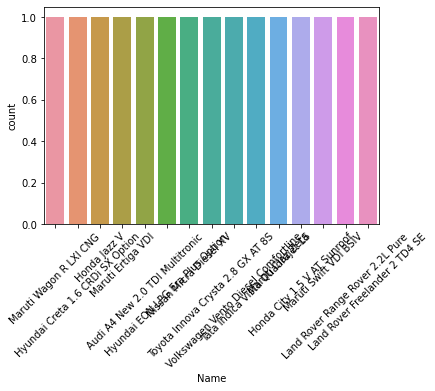

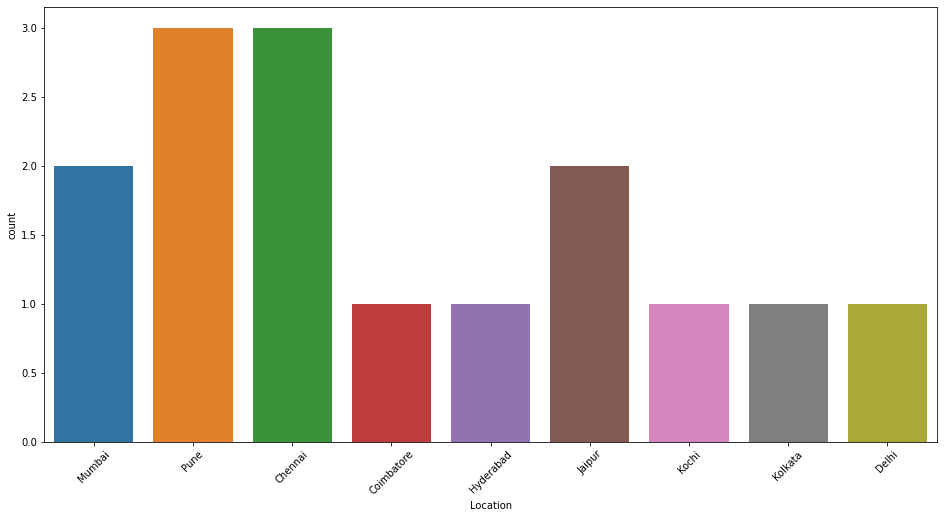

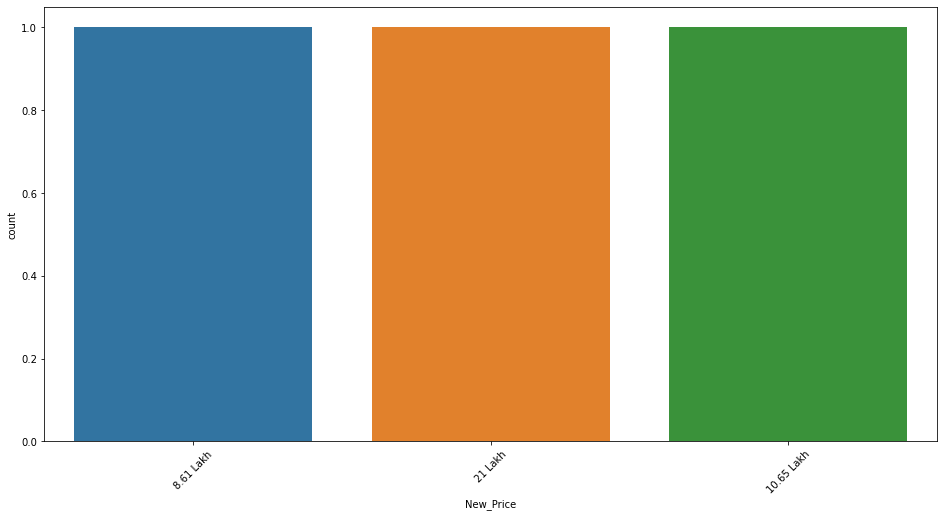

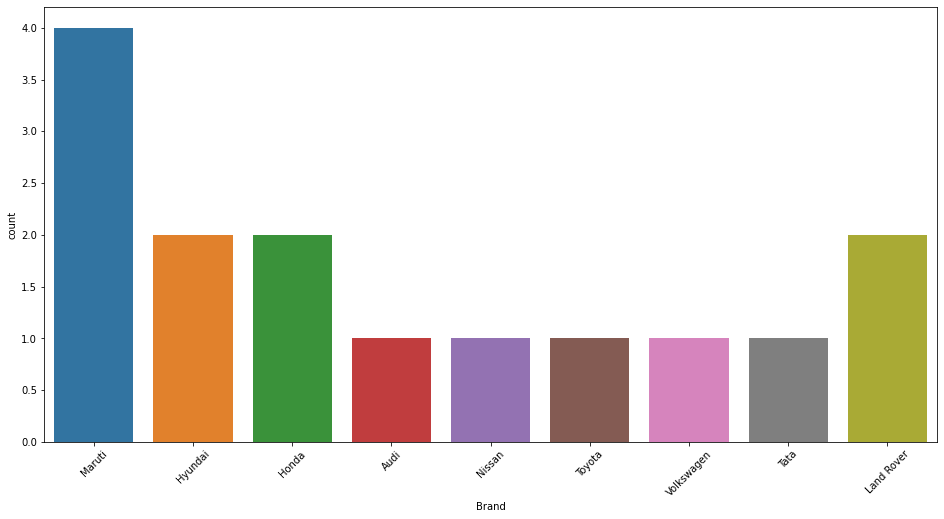

<Figure size 1152x576 with 0 Axes>

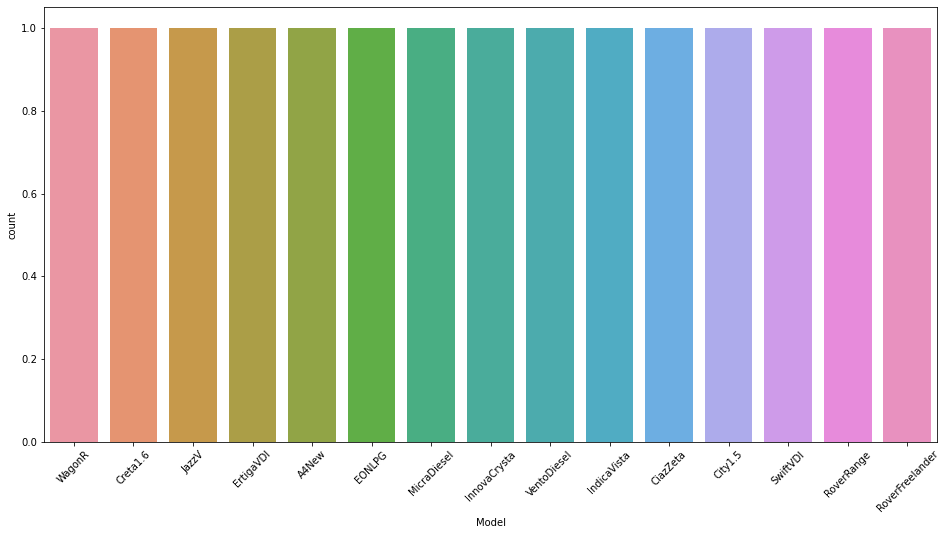

In [92]:
for i,features in enumerate(cat):
    plt.figure(figsize=(16,8))
    plt.figure(i)
    sns.countplot(df[features].head(15))
    plt.xticks(rotation=45)

plt.show()

From the count plot, we can have below observations

Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore

~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance

~72% of cars have manual transmission

~82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars.

~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai.

WagonR ranks first among all models which are available for purchase

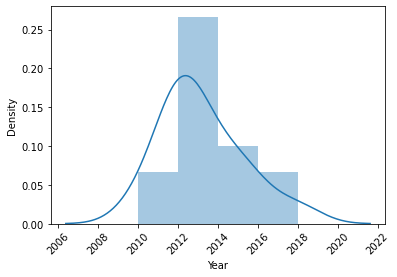

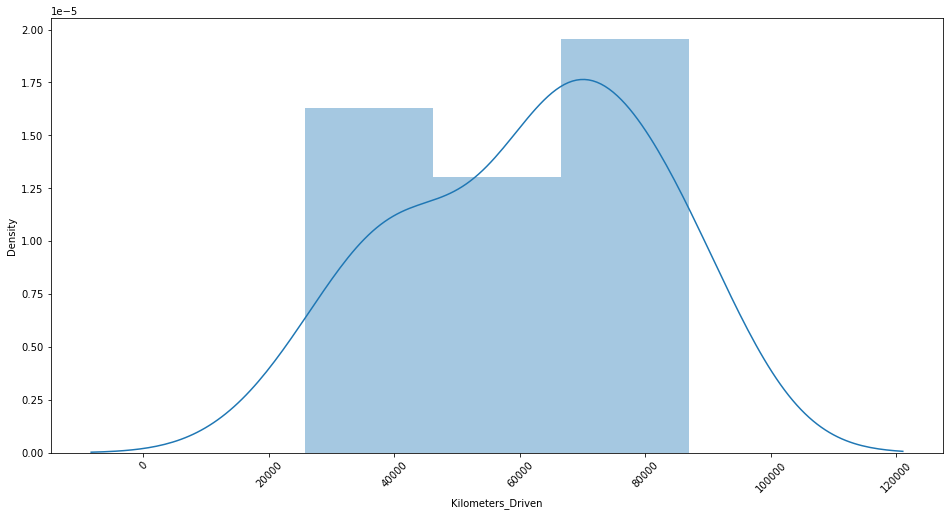

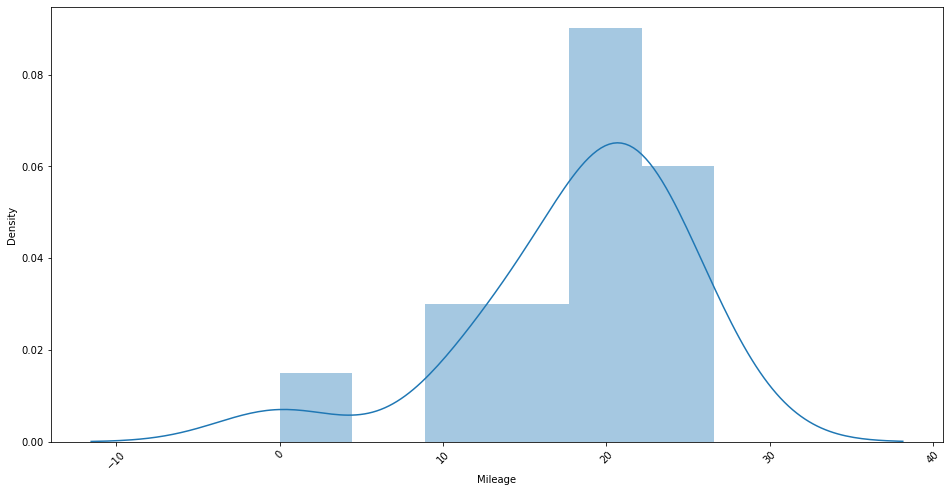

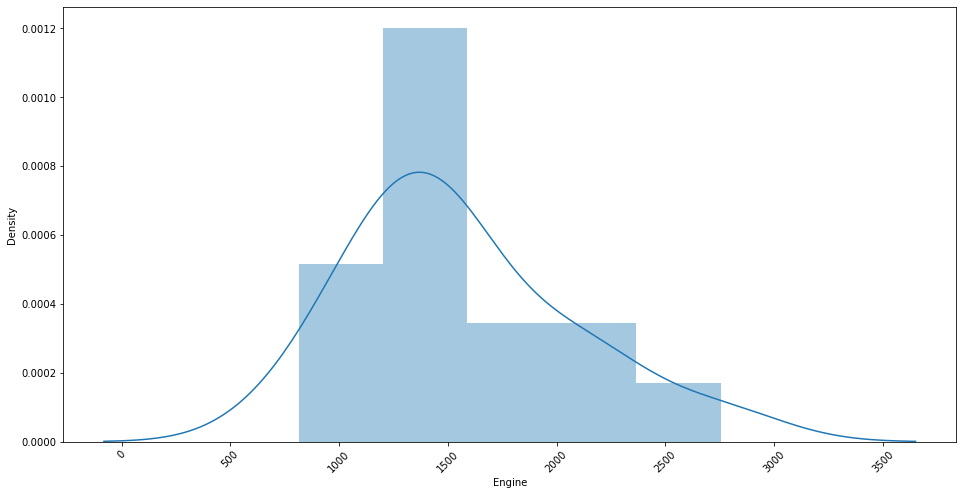

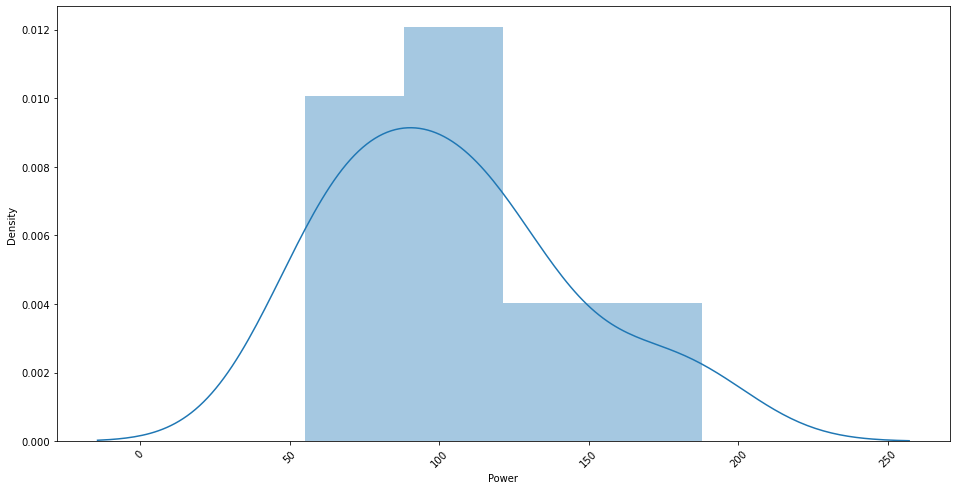

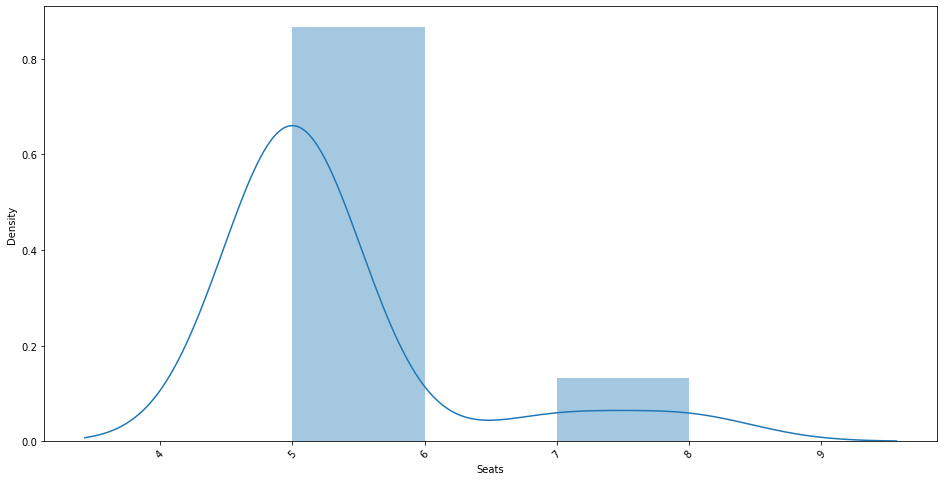

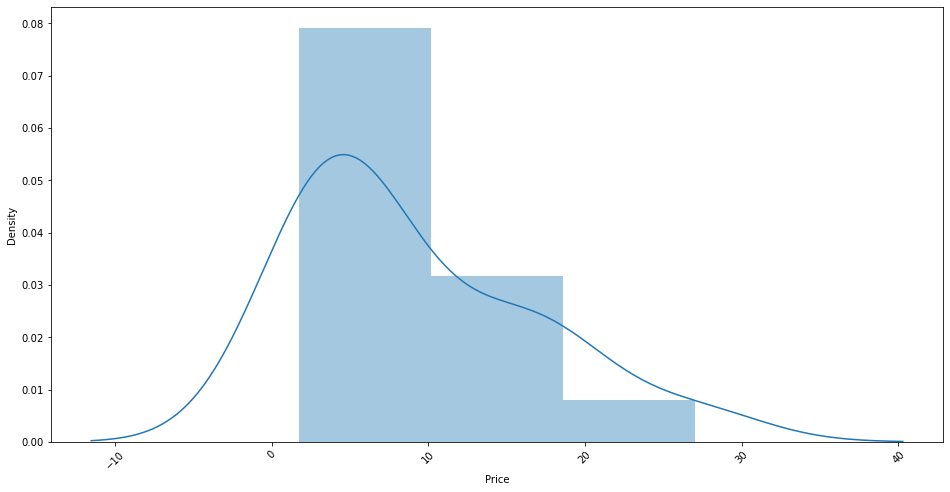

<Figure size 1152x576 with 0 Axes>

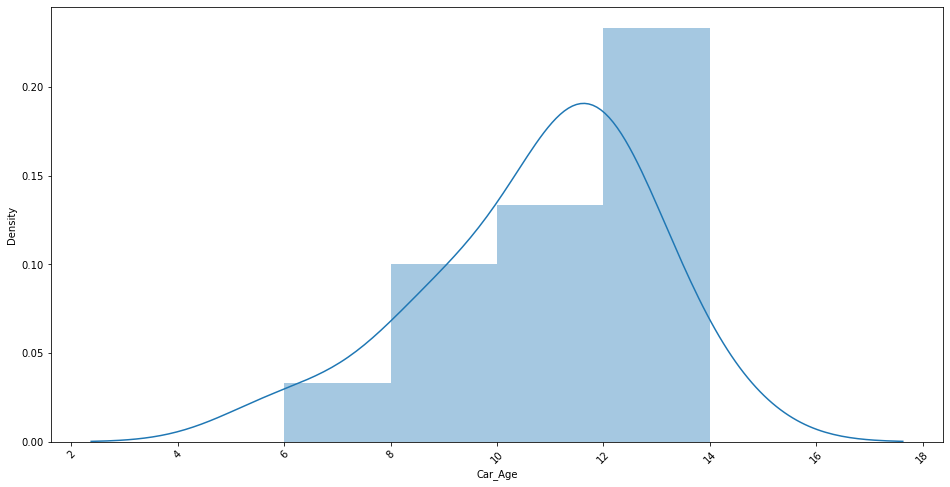

In [120]:
for i,features in enumerate(num):
    plt.figure(figsize=(16,8))
    plt.figure(i)
    sns.distplot(df[features].head(15),kde=True)
    plt.xticks(rotation=45)

plt.show()

Observation----
Distrubtions are right skewed , using Log transform can help in normalization

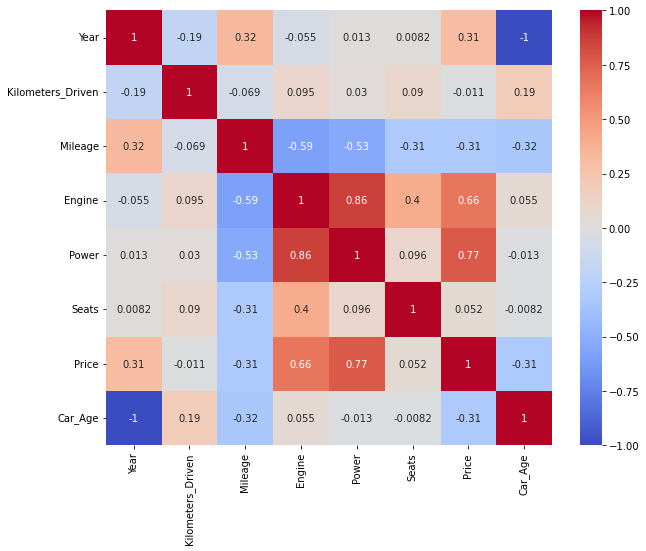

In [99]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True ,cmap="coolwarm" )
plt.show()

Observations------

Engine has strong positive correlation to Power [0.86].

Price has positive correlation to Engine[0.66] as well Power [0.77].

Mileage is negative correlated to Engine,Power,Price.,Ageofcar

Price has negative correlation to age of car.

Kilometer driven doesnt impact Price

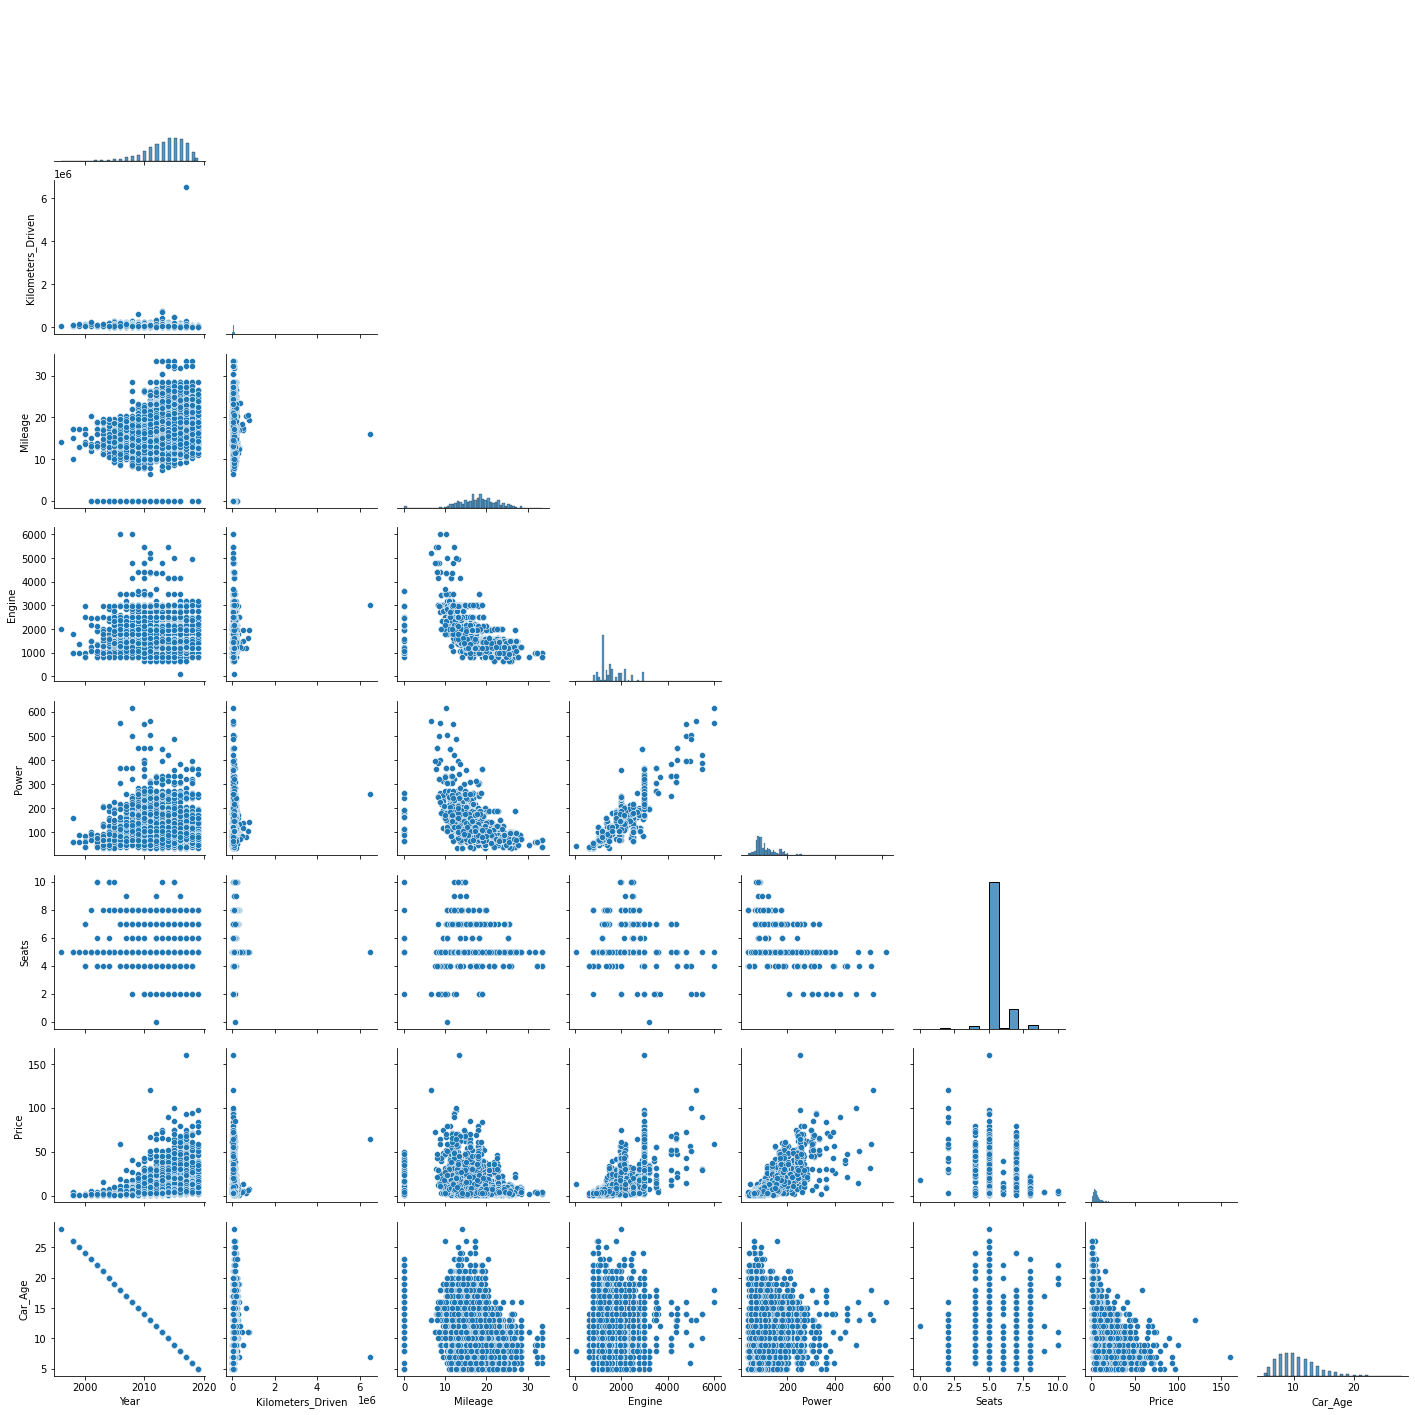

In [109]:
sns.pairplot(data=df,corner=True)
plt.show()

Observations

Same observation about correlation as seen in heatmap.

Kilometer driven doesnot have impact on Price .

As power increase mileage decrease.

Car with recent make sell at higher prices.

Engine and Power increase , price of the car seems to increase.

# Variables that are correlated with Price variable
Price Vs Engine Vs Transmission

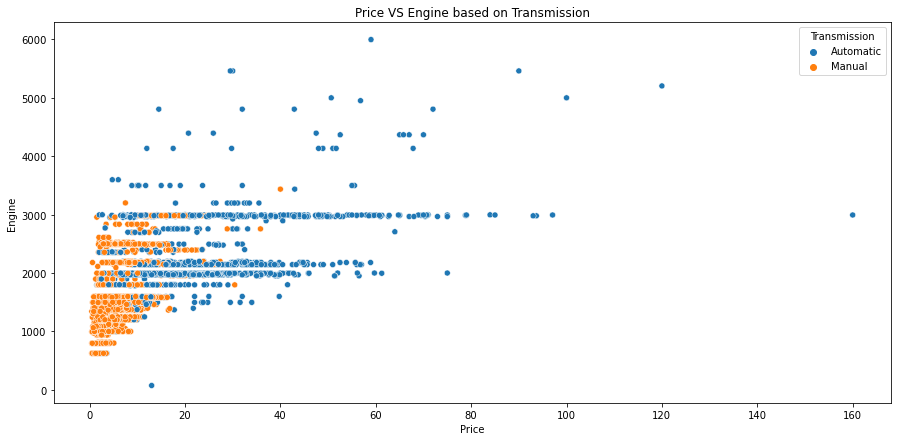

In [130]:
# understand relation ship of Engine vs Price and Transmimssion
plt.figure(figsize=(15,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=df)
plt.show()

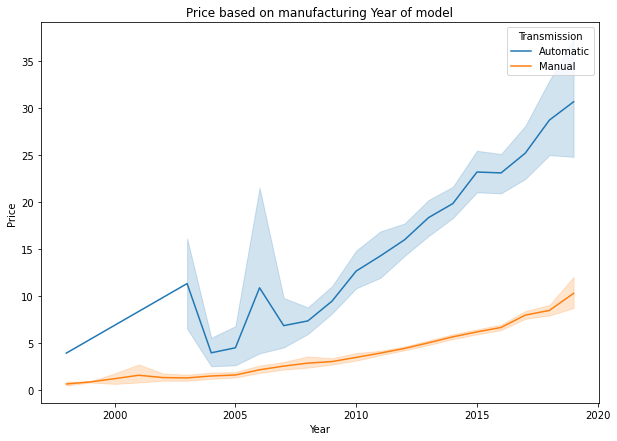

In [128]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission',data=df)
plt.show()

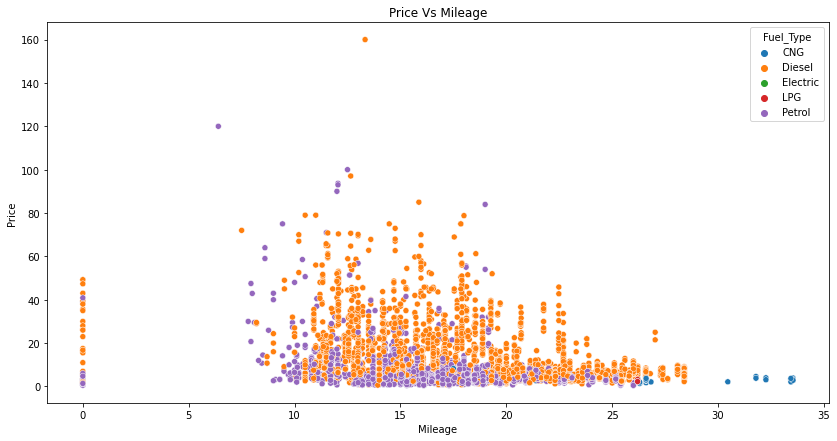

In [131]:
# Understand relationships  between price and mileage
plt.figure(figsize=(14,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=df)
plt.show()

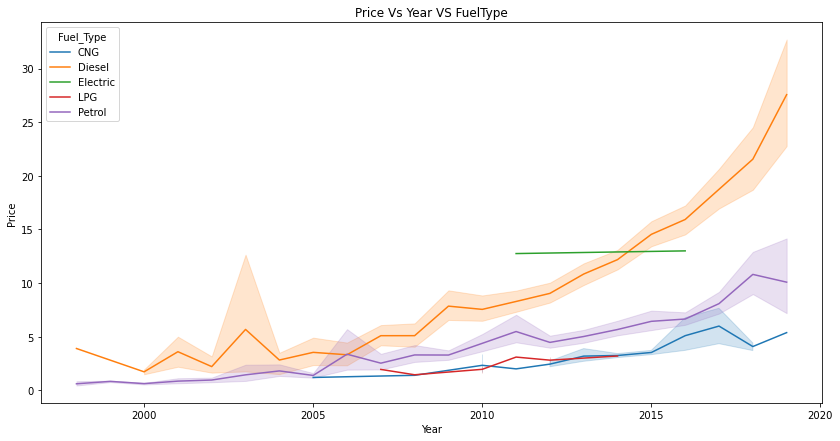

In [133]:
# Impact of years on price 
plt.figure(figsize=(14,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',data=df)
plt.show()

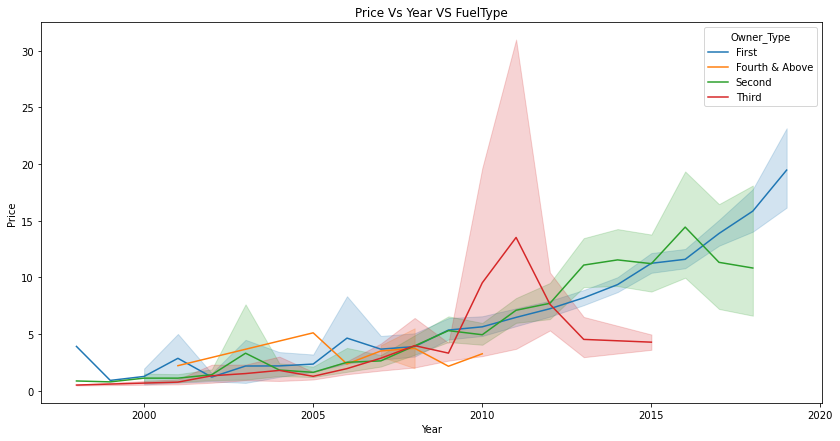

In [134]:
plt.figure(figsize=(14,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Owner_Type',data=df)
plt.show()

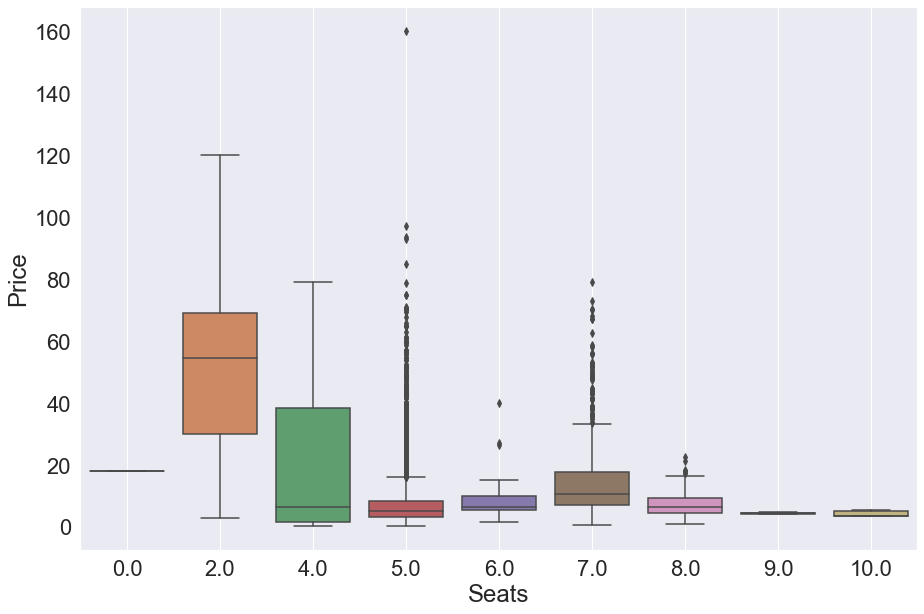

In [139]:
#Price and seats 
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.boxplot(x='Seats', y='Price', data=df)
plt.grid()

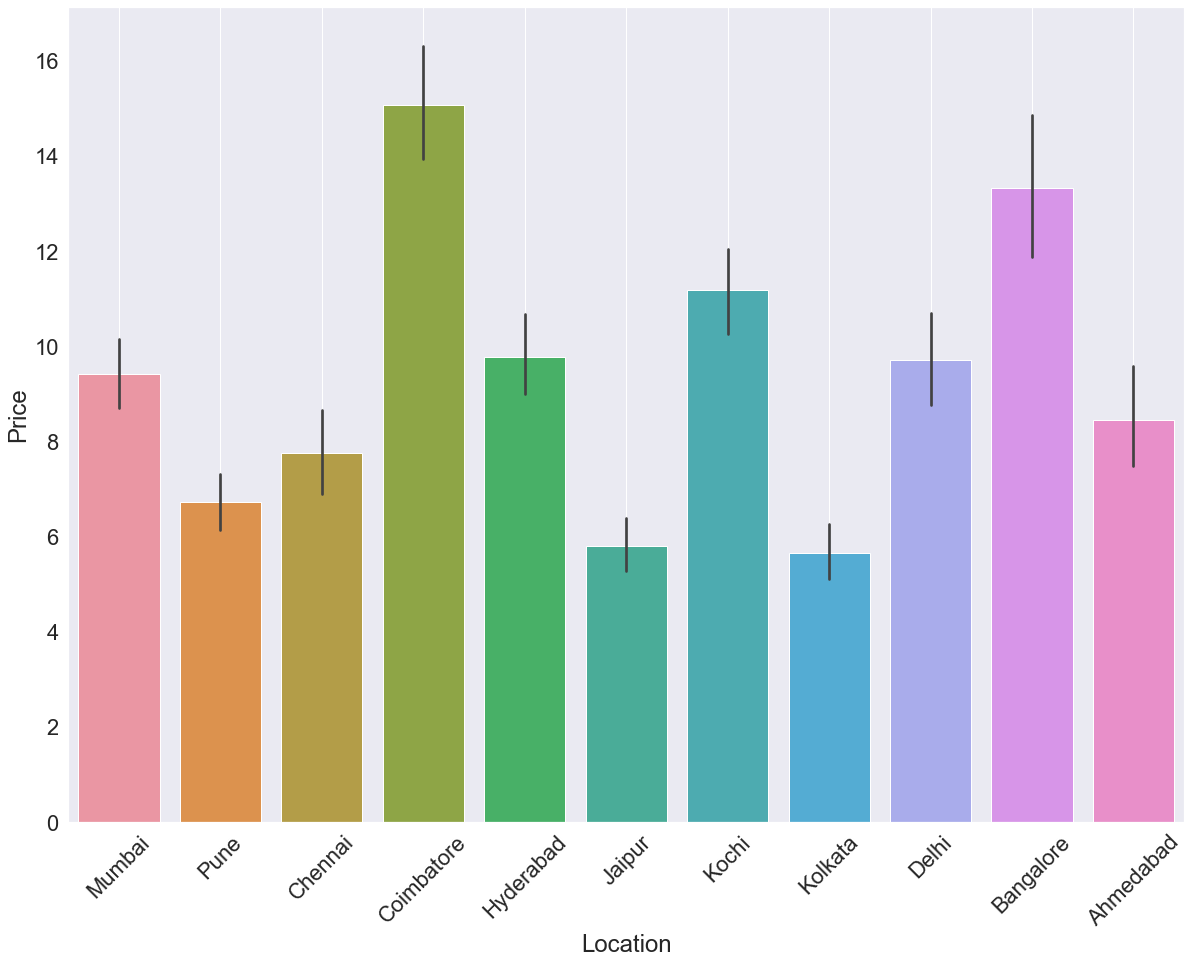

In [142]:
#Price and LOcation 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Location', y='Price', data=df)
plt.xticks(rotation=45)
plt.grid()

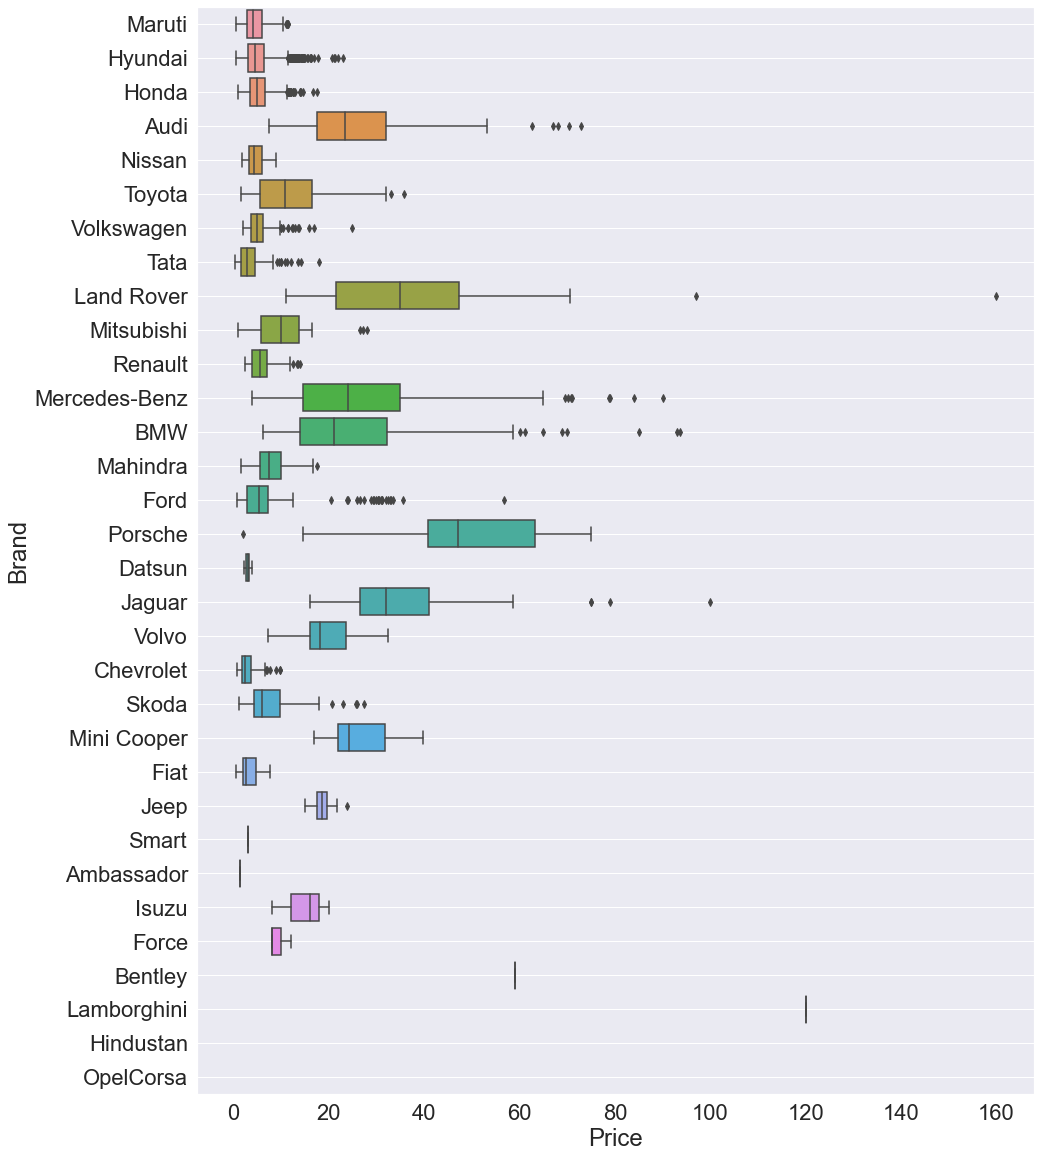

In [145]:
#Price and brand 
plt.figure(figsize=(15,20))
sns.set(font_scale=2)
sns.boxplot(x='Price', y='Brand', data=df)
plt.grid()

Observations----

Expensive cars are in Coimbatore and Banglore.

2 Seater cars are more expensive.

Deisel Fuel type car are more expensive compared to other fuel type.

As expected, Older model are sold cheaper compared to latest model.

Automatic transmission vehicle have a higher price than manual transmission vehicles.

Vehicles with more engine capacity have higher prices.

Price decreases as number of owner increases.

Automatic transmission require high engine and power.

Prices for Cars with fuel type as Deisel has increased with recent models.

Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

THANK YOU